In [11]:
import numpy as np
import matplotlib.pyplot as plt
import x_spins
import green2k

In [12]:
sp_ops = x_spins.make_spin_ops()
sz = sp_ops['Sz']
sp = sp_ops['S+']
sm = sp_ops['S-']
s0 = sp_ops['I']

In [13]:
L = 8
hamil = np.zeros((2**L, 2**L))
for i in range(L):
    szsz = [sz, sz] + [s0] * (L - 2)
    spsm = [sp, sm] + [s0] * (L - 2)
    smsp = [sm, sp] + [s0] * (L - 2)
    hamil += x_spins.make_matrix(szsz[i:] + szsz[:i]) + (x_spins.make_matrix(
        spsm[i:] + spsm[:i]) + x_spins.make_matrix(smsp[i:] + smsp[:i])) / 2.0

In [14]:
G0js = []
omegamax = 5
omegamesh = 40
for iomega in range(omegamesh):
    print("%d/%d"%(iomega, omegamesh))
    G0js_axis0 = []
    for j in range(L):
        omega = iomega / omegamesh * omegamax
        G0j = x_spins.make_Gij(hamil, L, 0, j, omega)
        G0js_axis0.append(G0j)
    G0js.append(G0js_axis0)
G0js = np.array(G0js)
np.save('G0js.npy', G0js)

0/40
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/40
34/40
35/40
36/40
37/40
38/40
39/40


In [20]:
G0js = np.load('G0js.npy')

In [16]:
xs = [i for i in range(L)]
omegas = [iomega / omegamesh * omegamax for iomega in range(omegamesh)]

$G_{0j}(\omega) = \sum_\lambda<\Phi_0|S^z_j\frac{|\Phi_\lambda><\Phi_\lambda|}{E_\lambda - E_0 + \omega + i\delta}S^z_0|\Phi_0>$

Text(0.5, 0.98, "Real space Green's function")

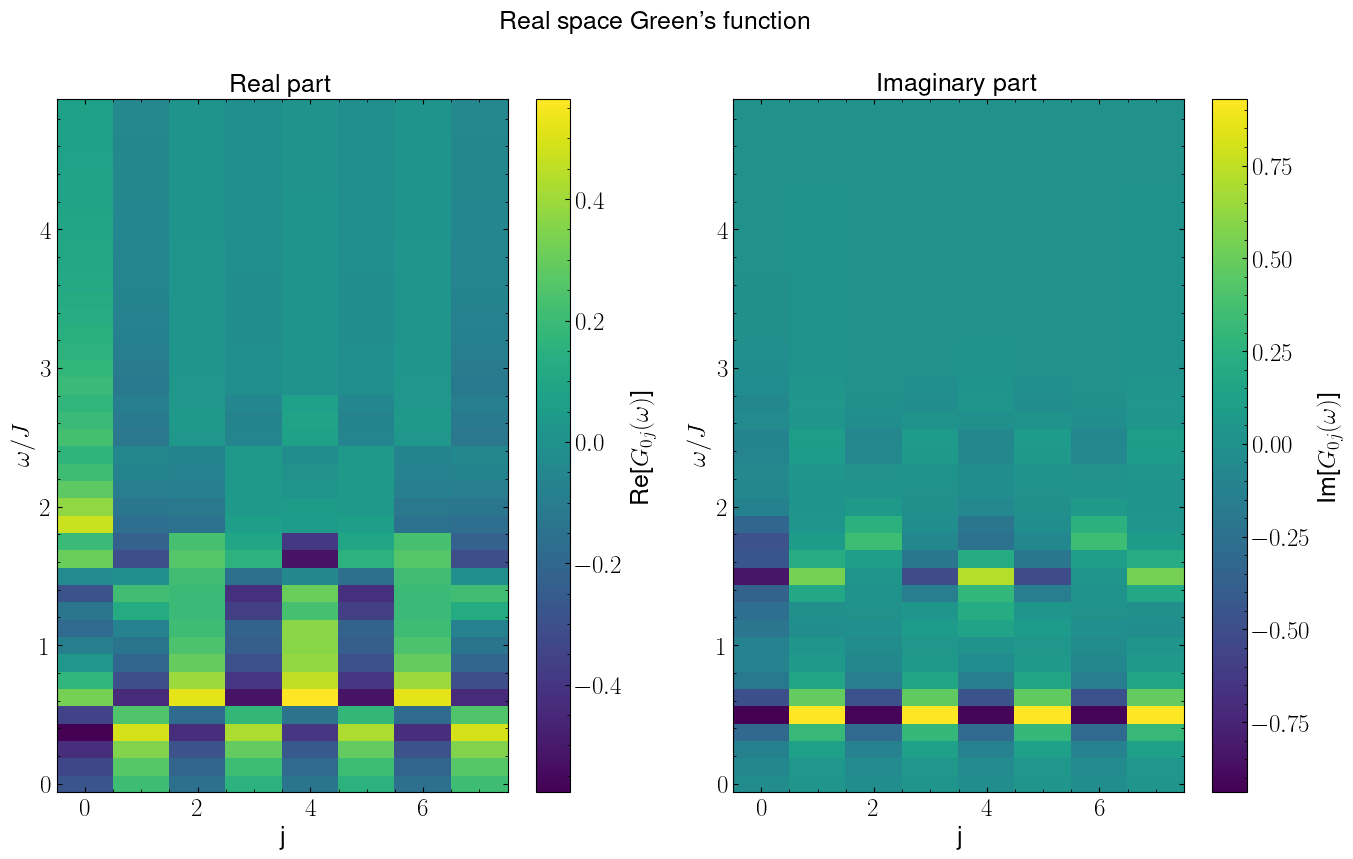

In [21]:
fig, axs = plt.subplots(1,2,figsize=(16,9))
mappable0 = axs[0].pcolor(xs, omegas, G0js.real)
mappable1 = axs[1].pcolor(xs, omegas, G0js.imag)
fig.colorbar(mappable0,label='Re[$G_{0j}(\omega)$]')
fig.colorbar(mappable1,label='Im[$G_{0j}(\omega)$]')
axs[0].set_xlabel('j')
axs[0].set_ylabel('$\omega/J$')
axs[0].set_title('Real part')
axs[1].set_xlabel('j')
axs[1].set_ylabel('$\omega/J$')
axs[1].set_title('Imaginary part')
fig.suptitle("Real space Green's function")

In [24]:
ks = [np.pi*(2*ik/L) for ik in range(L+1)]
Gkomegas = green2k.make_Gkomega(G0js,ks)

$G(k, \omega) = \frac{1}{\sqrt{L}}\sum_j e^{-ikj}G_{0j}(\omega)$

Text(0.5, 0.98, "Reciprocal space Green's function")

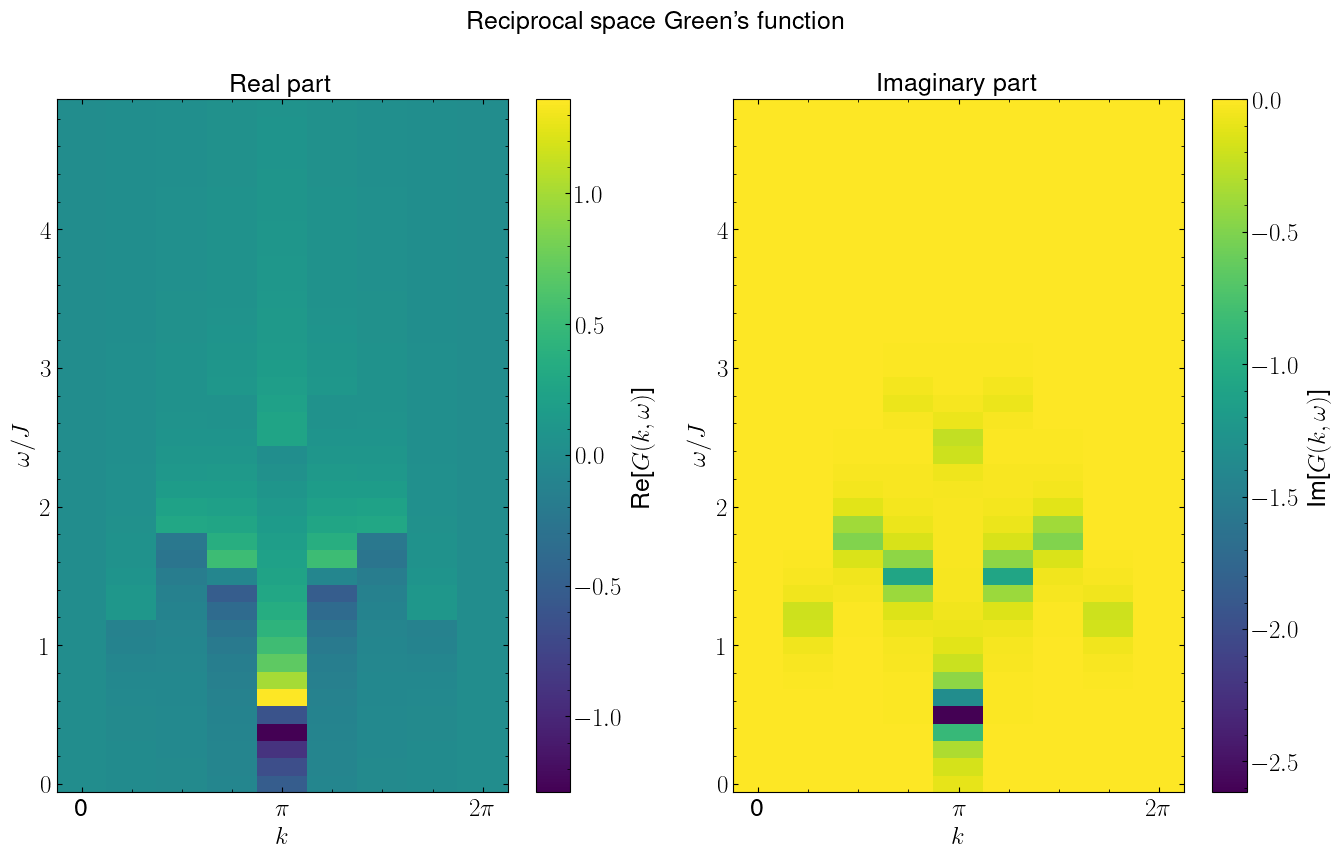

In [23]:
fig, axs = plt.subplots(1,2,figsize=(16,9))
mappable0 = axs[0].pcolor(ks, omegas, Gkomegas.real)
mappable1 = axs[1].pcolor(ks, omegas, Gkomegas.imag)
fig.colorbar(mappable0,label='Re[$G(k,\omega)$]')
fig.colorbar(mappable1,label='Im[$G(k,\omega)$]')

axs[0].set_xticks([0,np.pi,2*np.pi])
axs[0].set_xticklabels([0,'$\pi$','$2\pi$'])
axs[0].set_xlabel('$k$')
axs[0].set_ylabel('$\omega/J$')
axs[0].set_title('Real part')
axs[1].set_xticks([0,np.pi,2*np.pi])
axs[1].set_xticklabels([0,'$\pi$','$2\pi$'])
axs[1].set_xlabel('$k$')
axs[1].set_ylabel('$\omega/J$')
axs[1].set_title('Imaginary part')
fig.suptitle("Reciprocal space Green's function")